패키지 로드

In [43]:
import torch
import pandas as pd
import numpy as np
import csv
from hanspell import spell_checker
from collections import Counter
# 한국어 형태소 분석
from konlpy.tag import Okt, Hannanum, Kkma, Mecab, Komoran
# 워드클라우드
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter

데이터 불러오기

In [1]:
file_path = "C:/Users/NT550-048/Desktop/잇더/data/data_kurly_0724.csv"

In [4]:
data_kurly = pd.read_csv(file_path, index_col = 0)

데이터프레임 중 리스트 형식 문자열로 불러와질때 사용

In [50]:
data_kurly['tokens_noStem'] = data_kurly['tokens_noStem'].apply(lambda x:eval(x))

# 토큰화 (원형 살려서)
- stem : false

In [5]:
def token_pos(x):
    tagger = Okt()
    tokened = tagger.pos(x)
    #tokened = tagger.pos(x, norm = True, stem = True)
    return tokened

In [6]:
# 튜플 리스트 받아서 명사/동사/형용사만 추출
# word_class = ['Noun', 'Verb', 'Adjective']
def token_select(token_tuple_list, word_class):
    selected_token = []
    for token_review in token_tuple_list:
        if token_review[1] in word_class:
            selected_token.append(token_review[0])
    return selected_token

원형 살리지 않고 토큰화한 컬럼 추가

In [59]:
data_kurly['tokens_noStem'] = data_kurly['fixed_ReviewText'].apply(lambda x:token_pos(x))

토큰 중 품사 선택

In [52]:
word_class = ['Noun', 'Verb', 'Adjective']
data_kurly['token_noStem'] = data_kurly['tokens_noStem'].apply(lambda x:token_select(x, word_class))

# 빈도분석

긍정리뷰 빈도분석

In [58]:
Counter(sum(data_kurly[data_kurly['pred_label']==1]['token_noStem'].to_list(), [])).most_common(300)

[('맛있어요', 2206),
 ('맛', 1834),
 ('솥밥', 1783),
 ('구매', 1291),
 ('좋아요', 1286),
 ('잘', 1255),
 ('전복', 1193),
 ('밥', 1184),
 ('더', 1089),
 ('해', 1003),
 ('먹었어요', 967),
 ('거', 954),
 ('맛있게', 939),
 ('해서', 865),
 ('한', 840),
 ('재구매', 828),
 ('것', 734),
 ('좀', 710),
 ('했어요', 703),
 ('키트', 664),
 ('같아요', 627),
 ('수', 601),
 ('안', 600),
 ('먹기', 580),
 ('후기', 570),
 ('쌀', 568),
 ('때', 567),
 ('했는데', 559),
 ('추가', 543),
 ('주문', 541),
 ('맛있네요', 518),
 ('간편하고', 514),
 ('육수', 510),
 ('맛있어서', 499),
 ('끼', 488),
 ('미나리', 484),
 ('할', 483),
 ('정말', 476),
 ('입니다', 458),
 ('먹을', 457),
 ('또', 439),
 ('먹어', 439),
 ('기대', 430),
 ('조금', 417),
 ('양', 413),
 ('진짜', 412),
 ('요', 395),
 ('간편하게', 378),
 ('도미', 367),
 ('간장', 365),
 ('자주', 365),
 ('있어서', 362),
 ('넣고', 361),
 ('합니다', 360),
 ('좋네요', 352),
 ('먹었습니다', 351),
 ('생각', 341),
 ('아이', 332),
 ('있어요', 331),
 ('소스', 331),
 ('저', 330),
 ('먹는', 323),
 ('간이', 316),
 ('두', 306),
 ('맛있었어요', 302),
 ('집', 302),
 ('고기', 302),
 ('보고', 296),
 ('전기밥솥', 285),
 ('먹고', 282),

부정리뷰 빈도분석

In [59]:
Counter(sum(data_kurly[data_kurly['pred_label']==0]['token_selected'].to_list(), [])).most_common(300)

[('하다', 751),
 ('먹다', 417),
 ('맛', 274),
 ('안', 234),
 ('같다', 175),
 ('밥', 173),
 ('좀', 172),
 ('그냥', 165),
 ('전복', 164),
 ('것', 157),
 ('있다', 154),
 ('좋다', 144),
 ('않다', 141),
 ('거', 136),
 ('맛있다', 136),
 ('비리다', 132),
 ('재다', 126),
 ('그렇다', 126),
 ('솥밥', 126),
 ('보다', 119),
 ('별로', 115),
 ('미나리', 115),
 ('넣다', 108),
 ('없다', 107),
 ('고기', 103),
 ('아니다', 92),
 ('이다', 90),
 ('저', 87),
 ('더', 84),
 ('나다', 82),
 ('들다', 82),
 ('듯', 81),
 ('후기', 79),
 ('매다', 77),
 ('자다', 76),
 ('생각', 75),
 ('제', 72),
 ('육수', 69),
 ('해', 69),
 ('적다', 68),
 ('양', 67),
 ('냄새', 63),
 ('괜찮다', 62),
 ('짜다', 62),
 ('구매', 61),
 ('조금', 58),
 ('쌀', 58),
 ('도미', 58),
 ('아쉽다', 55),
 ('게', 52),
 ('가격', 50),
 ('느끼하다', 49),
 ('기대', 48),
 ('때', 48),
 ('전', 48),
 ('못', 47),
 ('생선', 46),
 ('버리다', 45),
 ('번', 45),
 ('주문', 45),
 ('좋아하다', 44),
 ('정도', 44),
 ('입맛', 44),
 ('사다', 42),
 ('소고기', 42),
 ('소스', 41),
 ('간장', 40),
 ('이', 40),
 ('모르다', 40),
 ('기대하다', 40),
 ('되다', 39),
 ('요', 39),
 ('키트', 39),
 ('많다', 37),
 ('쏘다', 36),
 ('만

빈도 데이터 프레임으로 저장

In [56]:
temp = Counter(sum(data_kurly['token_noStem'].to_list(), [])).most_common(300)

In [57]:
pd.DataFrame(temp, columns=[1,2])

,1,2
0,맛있어요,2212
1,맛,2108
2,솥밥,1909
3,밥,1357
4,전복,1357
...,...,...
295,들어있는,72
296,보니,71
297,포장,71
298,나물,71


# 워드클라우드

워드클라우드 기본 함수
- 밥 모양 배경파일 다운로드 필요

In [21]:
#워드클라우드 함수
def wc_kurly(data):
    words = dict(Counter(sum(data.to_list(), [])).most_common(300))
    img = Image.open("C:/Users/NT550-048/Desktop/잇더/rice.jpg")
    imgArray = np.array(img)
    wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='black',colormap = "Accent_r",
                        width=8000, height=5000, mask=imgArray).generate_from_frequencies(words)
    plt.imshow(wordcloud) 
    plt.axis('off') 
    plt.show()

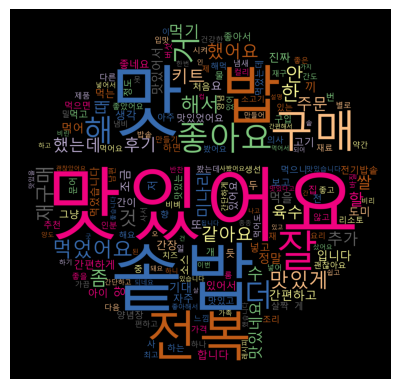

In [22]:
wc_kurly(data_kurly['token_noStem'])

# 빈도수, 워드클라우드 한번에 보여주는 함수

빈도수 함수

In [95]:
# 빈도수 함수
def word_analysis(df, product_name, label, token_class):
    df_word = df[(df['ProductName']==product_name)&(df['pred_label']==label)]
    word_list = df_word['tokens_noStem'].apply(lambda x:token_select(x, token_class))
    word_tuple = Counter(sum(word_list.to_list(), [])).most_common(300)
    #word_df = pd.DataFrame(word_tuple, columns=['token', 'n'])
    return word_tuple

워드클라우드 함수

In [7]:
def word_analysis(df, product_name, label, token_class):
    df_word = df[(df['ProductName']==product_name)&(df['pred_label']==label)]
    word_list = df_word['tokens_noStem'].apply(lambda x:token_select(x, token_class))
    word_tuple = Counter(sum(word_list.to_list(), [])).most_common(300)
    #word_df = pd.DataFrame(word_tuple, columns=['token', 'n'])
    words = dict(word_tuple)
    img = Image.open("C:/Users/NT550-048/Desktop/잇더/rice.jpg")
    imgArray = np.array(img)
    wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='black',colormap = "Accent_r",
                        width=8000, height=5000, mask=imgArray).generate_from_frequencies(words)
    plt.imshow(wordcloud) 
    plt.axis('off')
    if label == 1:
        label = '긍정리뷰'
    else:
        label = '부정리뷰'
    print(product_name, '상품의 총', len(df_word), '개의', label, '분석')
    return word_tuple, plt.show()

빈도 분석 및 워드클라우드 시각화 수행
- word_analysis(데이터, 제품명, 긍부정 라벨, 원하는 품사 리스트)

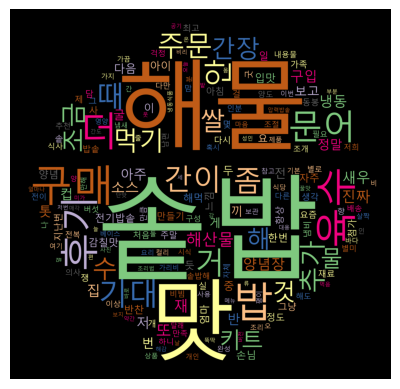

([('솥밥', 80),
  ('해물', 56),
  ('맛', 48),
  ('구매', 47),
  ('밥', 45),
  ('육수', 44),
  ('더', 41),
  ('후기', 39),
  ('문어', 35),
  ('기대', 33),
  ('거', 32),
  ('간이', 30),
  ('때', 29),
  ('안', 29),
  ('좀', 29),
  ('주문', 27),
  ('추가', 25),
  ('먹기', 24),
  ('조금', 23),
  ('쌀', 23),
  ('수', 22),
  ('간장', 22),
  ('해', 21),
  ('것', 20),
  ('키트', 19),
  ('물', 19),
  ('해산물', 18),
  ('또', 17),
  ('재', 15),
  ('진짜', 15),
  ('새우', 14),
  ('집', 14),
  ('냉동', 14),
  ('양념장', 14),
  ('소스', 14),
  ('저', 13),
  ('구입', 13),
  ('톳', 12),
  ('아주', 12),
  ('컵', 12),
  ('반', 12),
  ('정말', 11),
  ('보고', 11),
  ('번', 11),
  ('끼', 10),
  ('전', 10),
  ('굴', 10),
  ('다음', 9),
  ('게', 9),
  ('이', 8),
  ('아이', 8),
  ('두', 8),
  ('입맛', 8),
  ('중', 8),
  ('반찬', 7),
  ('일', 7),
  ('요', 7),
  ('엄마', 7),
  ('듯', 7),
  ('자주', 7),
  ('감칠맛', 7),
  ('전기밥솥', 7),
  ('느낌', 7),
  ('한번', 7),
  ('손님', 7),
  ('해먹', 7),
  ('양념', 7),
  ('아침', 6),
  ('지난번', 6),
  ('항상', 6),
  ('그냥', 6),
  ('정도', 6),
  ('사', 6),
  ('만들기', 6),
  ('첨가', 6),
  

In [103]:
product_name = '[아우름] 바다를 품은 톳 해물솥밥키트'
label = 1
token_class = ['Noun']
word_analysis(data_kurly, product_name, label, token_class)

# 단어 연관 분석

In [23]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import plotly
import plotly.graph_objects as go

연관 분석 수행할 제품 및 토큰 선택해 리스트로 변환 

In [39]:
review_list = data_kurly[data_kurly['ProductName'] == '[온하루] 한돈 건나물 솥밥키트']['token_selected'].to_list()

In [38]:
# 토큰 리스트 문자열로 불러와질때 처리
data_kurly['token_selected'] = data_kurly['token_selected'].apply(lambda x:eval(x))

연관분석 모델 생성

In [40]:
model = Word2Vec(sentences = review_list, vector_size = 100, window = 5, min_count = 10, workers = 4, sg = 1)

연관관계 시각화

In [42]:
# annotation text 만들기 (시각화할 때 벡터 말고 단어도 필요하니까)
# vocabs = word_vectors.vocab.keys()

word_vectors = model.wv
vocabs = word_vectors.key_to_index.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys=xys[:,1]

text=[]
for i,v in enumerate(vocabs):
    text.append(v)

fig = go.Figure(data=go.Scatter(x=xs,
                                y=ys,
                                mode='markers+text',
                                text=text)) 

fig.update_layout(title='Kurly Review')
fig.show()

plotly.offline.plot(
fig, filename='kurly_review.html'
)
# 파일 저장시
#fig.write_html("C:/Users/NT550-048/Desktop/잇더/솥밥/kurly_review_온하루한돈건나물솥밥.html")

'kurly_review.html'